In [215]:
pip install pmdarima

In [216]:
# Import the necessary libraries

import pandas as pd
import numpy as np

In [217]:
# Loading the dataset

df=pd.read_csv('exchange_rate.csv', index_col='date', parse_dates=True)
df=df.dropna()
print('Shape of data', df.shape)
df

Shape of data (7588, 1)


,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [218]:
# Exploratory data analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


In [219]:
df.shape

(7588, 1)

In [220]:
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


In [221]:
df.tail()

,Ex_rate
date,
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197
2010-10-09,0.720825
2010-10-10,0.720825


In [222]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


<Axes: xlabel='date'>

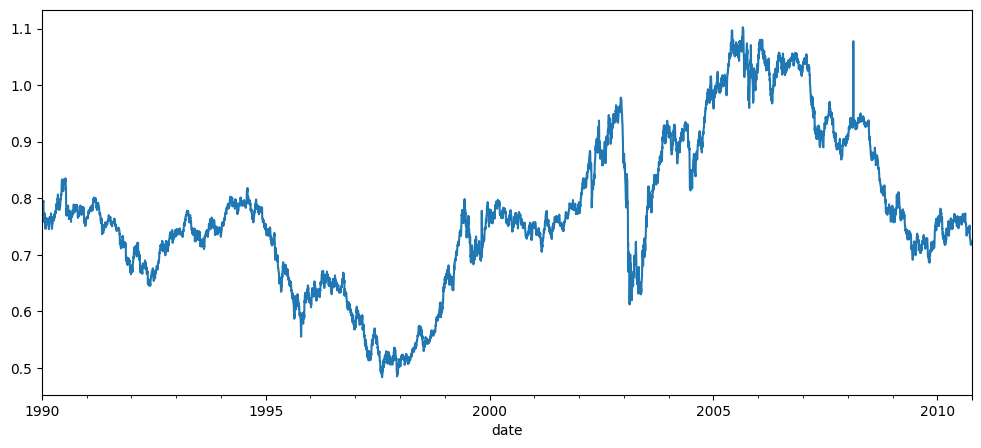

In [223]:
# Data plotting

df['Ex_rate'].plot(figsize=(12,5))

In [224]:
# Check for stationarity

from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print('1. ADF : ', dftest[0])
  print('2. P-Value : ', dftest[1])
  print('3. Num of lags : ', dftest[2])
  print('Num of observations used for ADF Regression and Critical Values Calculation :', dftest[3])
  print('5. Critical values :')

  for key,val in dftest[4].items():
    print('\t',key, ': ',val)

In [225]:
ad_test(df['Ex_rate'])

1. ADF :  -1.6649941807382342
2. P-Value :  0.4492327353597477
3. Num of lags :  1
Num of observations used for ADF Regression and Critical Values Calculation : 7586
5. Critical values :
	 1% :  -3.4312123140180137
	 5% :  -2.861921078147796
	 10% :  -2.5669728434336108


In [226]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [227]:
stepwise_fit = auto_arima(df['Ex_rate'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-56098.154, Time=4.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-55972.211, Time=4.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56102.338, Time=1.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56100.772, Time=13.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55974.195, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56100.340, Time=5.45 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-56100.341, Time=6.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-56098.328, Time=8.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-56104.319, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-56102.321, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56102.322, Time=1.53 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-56102.753, Time=0.81 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-56100.315, Time=4.31 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 52.193 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:               SARIMAX(1, 1, 0)   Log Likelihood               28054.159
Date:                Tue, 06 Aug 2024   AIC                         -56104.319
Time:                        08:28:56   BIC                         -56090.450
Sample:                    01-01-1990   HQIC                        -56099.559
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865011.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [228]:
# Train the model

from statsmodels.tsa.arima.model import ARIMA

In [229]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(7558, 1) (30, 1)


In [230]:
model = ARIMA(train['Ex_rate'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7558
Model:                 ARIMA(1, 0, 5)   Log Likelihood               27938.486
Date:                Tue, 06 Aug 2024   AIC                         -55860.972
Time:                        08:29:03   BIC                         -55805.529
Sample:                    01-01-1990   HQIC                        -55841.941
                         - 09-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7771      0.090      8.645      0.000       0.601       0.953
ar.L1          0.9993      0.000   2254.598      0.000       0.998       1.000
ma.L1         -0.1306      0.002    -54.928      0.000      -0.135      -0.126
ma.L2          0.0152      0.006      2.457      0.014       0.003       0.027
ma.L3         -0.0182      0.007     -2.637      0.008      -0.032      -0.005
ma.L4          0.0048      0.009      0.516      0.606      -0.013       0.023
ma.L5          0.0115      0.010      1.197      0.231      -0.007       0.030
sigma2        3.6e-05   1.06e-07    340.980      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           2857554.54
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [231]:
# Make predictions on test set

start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]

2010-09-11    0.744300
2010-09-12    0.744305
2010-09-13    0.744177
2010-09-14    0.744236
2010-09-15    0.744303
2010-09-16    0.744327
2010-09-17    0.744352
2010-09-18    0.744376
2010-09-19    0.744401
2010-09-20    0.744425
2010-09-21    0.744449
2010-09-22    0.744474
2010-09-23    0.744498
2010-09-24    0.744522
2010-09-25    0.744547
2010-09-26    0.744571
2010-09-27    0.744595
2010-09-28    0.744619
2010-09-29    0.744644
2010-09-30    0.744668
2010-10-01    0.744692
2010-10-02    0.744716
2010-10-03    0.744740
2010-10-04    0.744764
2010-10-05    0.744789
2010-10-06    0.744813
2010-10-07    0.744837
2010-10-08    0.744861
2010-10-09    0.744885
2010-10-10    0.744909
Freq: D, Name: predicted_mean, dtype: float64


<Axes: xlabel='date'>

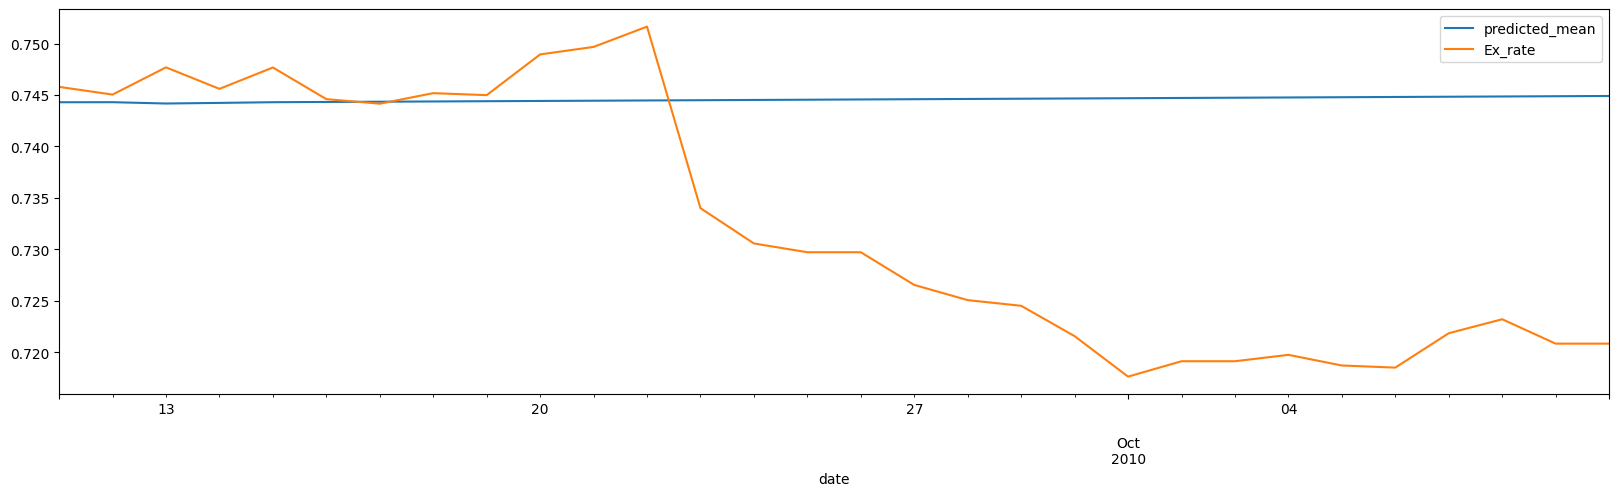

In [232]:
pred.plot(legend=True)
test['Ex_rate'].plot(legend=True)

In [233]:
test['Ex_rate'].mean()

0.732738

In [234]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['Ex_rate']))
print(rmse)

0.017054212898176244


In [235]:
model2=ARIMA(df['Ex_rate'], order=(1,0,5))
model2=model2.fit()
df.tail()

,Ex_rate
date,
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197
2010-10-09,0.720825
2010-10-10,0.720825


In [236]:
# Future dates predictions

index_future_dates=pd.date_range(start='2010-10-10',end='2010-11-9')
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA predictions')
pred.index=index_future_dates
print(pred)

2010-10-10    0.720851
2010-10-11    0.720975
2010-10-12    0.721030
2010-10-13    0.721044
2010-10-14    0.721082
2010-10-15    0.721124
2010-10-16    0.721165
2010-10-17    0.721206
2010-10-18    0.721247
2010-10-19    0.721289
2010-10-20    0.721330
2010-10-21    0.721371
2010-10-22    0.721412
2010-10-23    0.721453
2010-10-24    0.721494
2010-10-25    0.721535
2010-10-26    0.721576
2010-10-27    0.721617
2010-10-28    0.721658
2010-10-29    0.721699
2010-10-30    0.721739
2010-10-31    0.721780
2010-11-01    0.721821
2010-11-02    0.721862
2010-11-03    0.721902
2010-11-04    0.721943
2010-11-05    0.721984
2010-11-06    0.722024
2010-11-07    0.722065
2010-11-08    0.722105
2010-11-09    0.722146
Freq: D, Name: ARIMA predictions, dtype: float64


<Axes: >

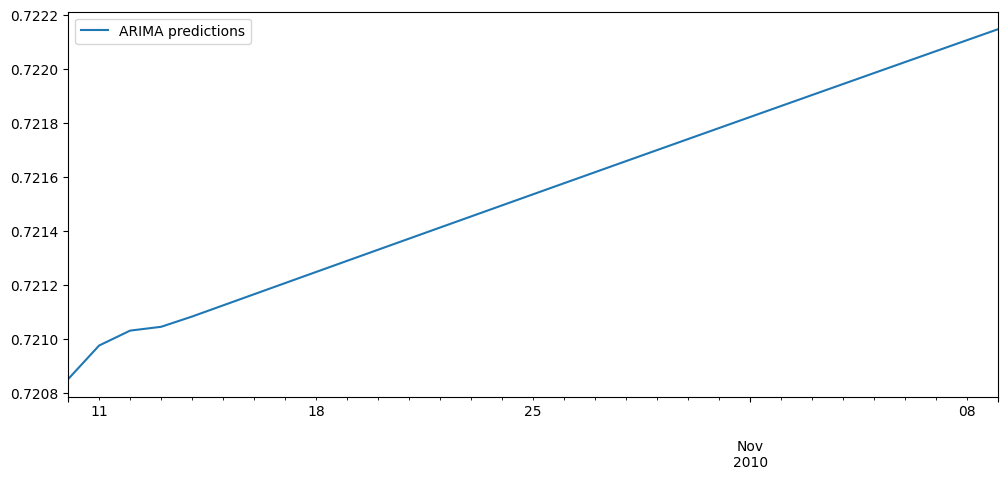

In [237]:
pred.plot(figsize=(12,5),legend=True)

In [238]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

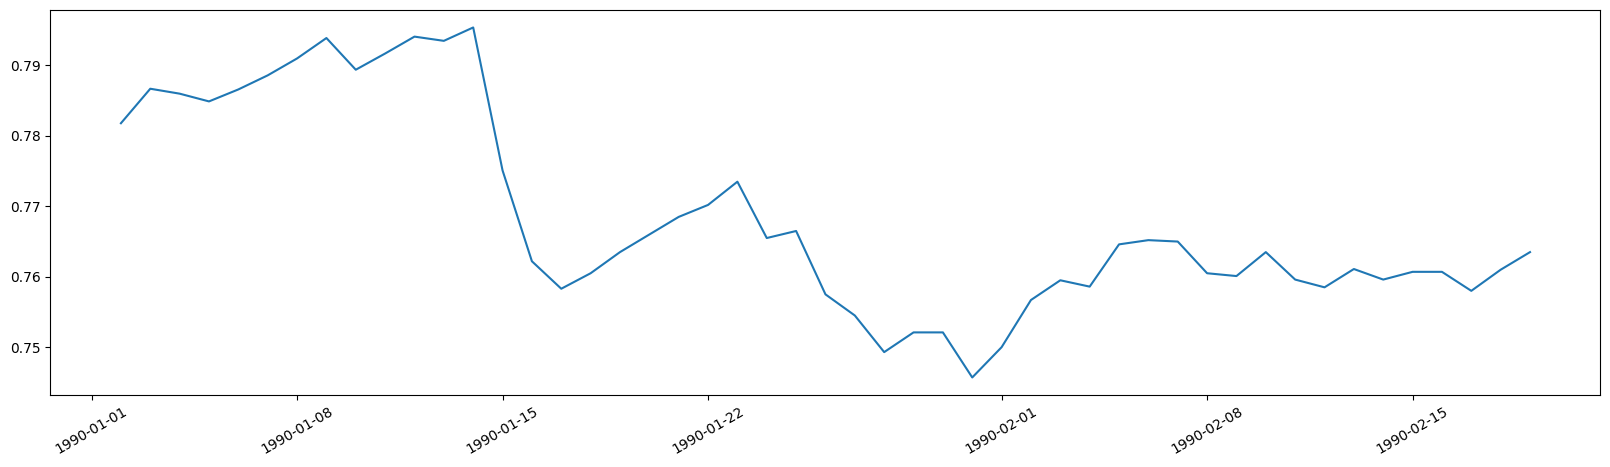

In [239]:
# Moving average method

plt.plot(df[1:50]['Ex_rate'])
plt.xticks(rotation=30)
plt.show()

In [240]:
# Rolling average transform

rollingseries = df[1:50].rolling(window=10)
rollingmean = rollingseries.mean()
print(rollingmean.head(10))

            Ex_rate
date               
1990-01-02      NaN
1990-01-03      NaN
1990-01-04      NaN
1990-01-05      NaN
1990-01-06      NaN
1990-01-07      NaN
1990-01-08      NaN
1990-01-09      NaN
1990-01-10      NaN
1990-01-11  0.78806


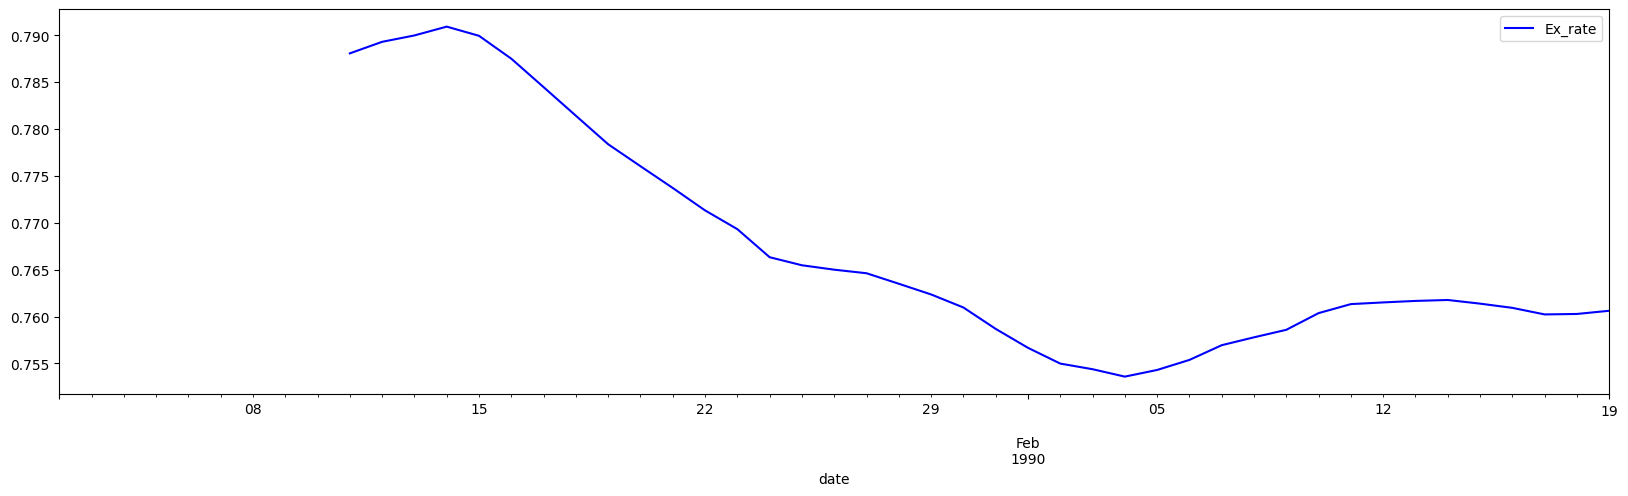

In [241]:
# Plot transferred dataset

rollingmean.plot(color='blue')
pyplot.show()

In [242]:
# Simple exponential smoothing

data = df[1:50]
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

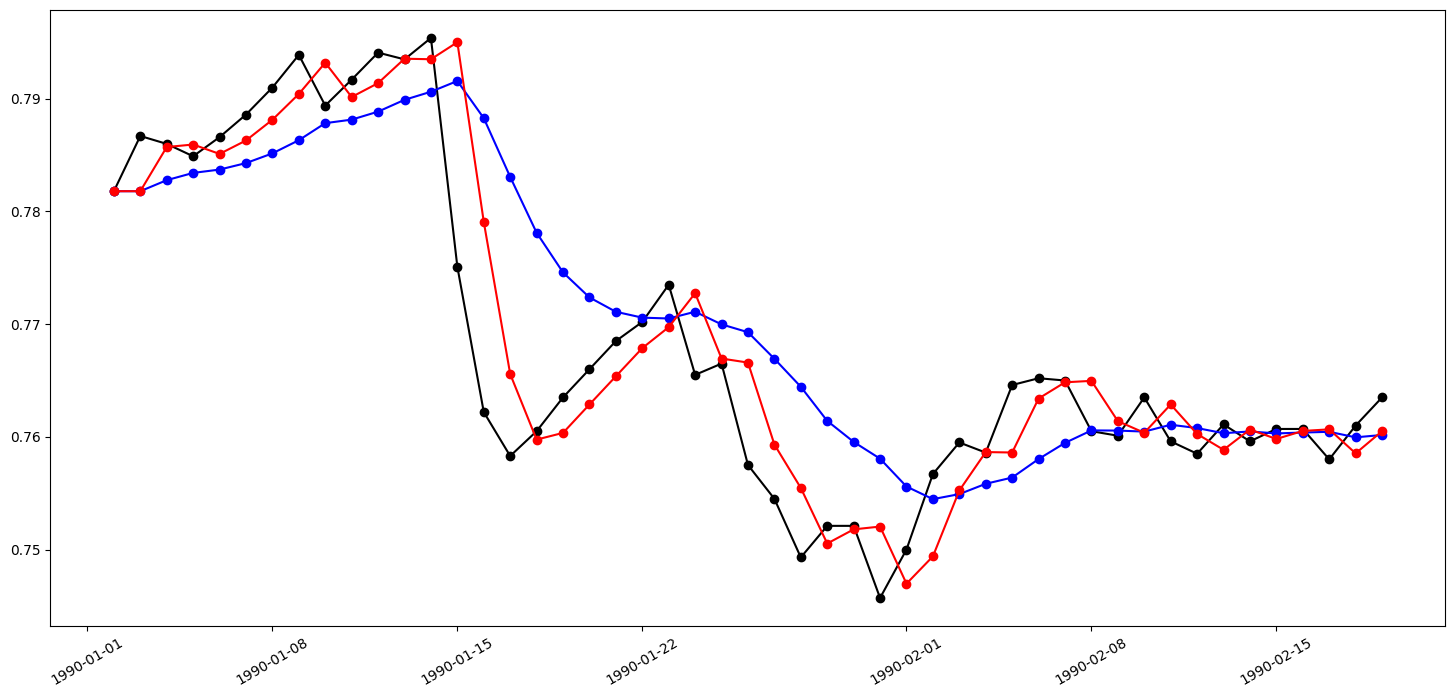

In [243]:
plt.figure(figsize=(18,8))
plt.plot(df[1:50], marker='o', color='black')
plt.xticks(rotation=30)
plt.plot(fit1.fittedvalues, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')

In [244]:
# Holt method for exponential smoothing

fit1 = Holt(data).fit()
fit2 = Holt(data, exponential=True).fit()

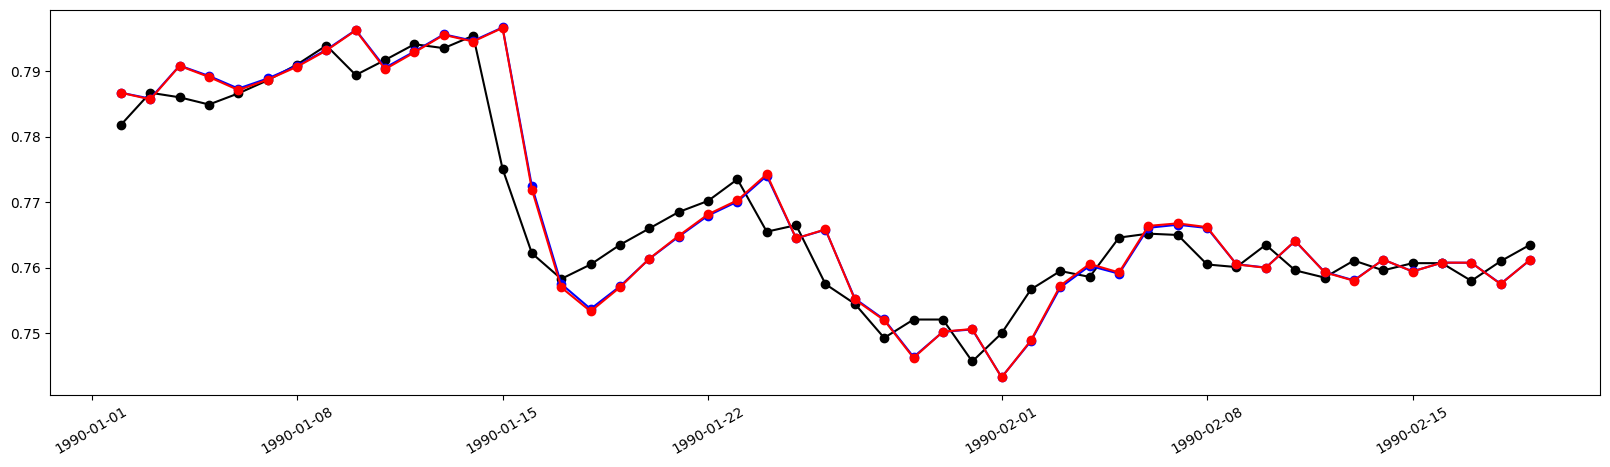

In [245]:
plt.plot(data, marker='o', color='black')
plt.xticks(rotation=30)
plt.plot(fit1.fittedvalues, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')